In [298]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import collections

In [261]:
# read file
df = pd.read_excel("Pizza Sales.xlsx")
df.shape

(48620, 12)

In [272]:
# brief overview of data
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [273]:
# get columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [264]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [265]:
# confirm there are no duplicate rows
df[df.duplicated()]

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name


In [266]:
# check for null values 
df.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
48615    False
48616    False
48617    False
48618    False
48619    False
Length: 48620, dtype: bool

In [276]:
pizza_name = df["pizza_name"]
pizza_count = pizza_name.value_counts()
pizza_count.head(15) # display first 15

The Classic Deluxe Pizza             2416
The Barbecue Chicken Pizza           2372
The Hawaiian Pizza                   2370
The Pepperoni Pizza                  2369
The Thai Chicken Pizza               2315
The California Chicken Pizza         2302
The Sicilian Pizza                   1887
The Spicy Italian Pizza              1887
The Southwest Chicken Pizza          1885
The Four Cheese Pizza                1850
The Italian Supreme Pizza            1849
The Big Meat Pizza                   1811
The Vegetables + Vegetables Pizza    1510
The Mexicana Pizza                   1456
The Napolitana Pizza                 1451
Name: pizza_name, dtype: int64

<AxesSubplot:title={'center':'Top 10 Pizza'}, xlabel='Pizza', ylabel='Quantity'>

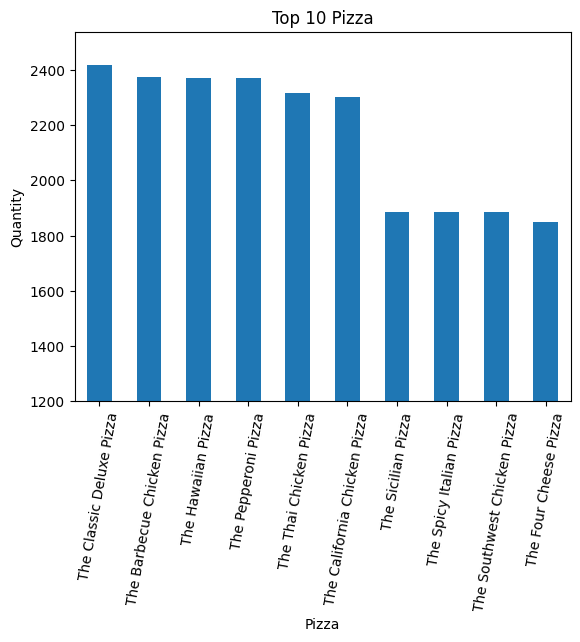

In [277]:
# get top 10 selling pizzas
top10 = pizza_count[0:10]

plt.figure()
top10.plot.bar(ylim=1200, xlabel='Pizza', ylabel='Quantity', title='Top 10 Pizza',rot=800)

# Classic Deluxe Pizza is bestseller
# Pizzas containing Chicken are mostly popular 

In [278]:
# get worst selling pizza
worst = pizza_name.value_counts(ascending=True).index[0]
worst

# Brie Carre Pizza is the worst selling 

'The Brie Carre Pizza'

In [280]:
# Total value per order
df2 = df[["order_id", "total_price"]]

# Get total number of orders 
total_order_num = df2.groupby("order_id").sum().shape[0]

# Get total order value per table
value_per_order = df2.groupby("order_id").sum()
total_order_value = value_per_order["total_price"].sum()

# Average order value per table
avg_value_per_order = total_order_value / total_order_num
f"Average order value per table: ${avg_value_per_order}"

'Average order value per table: $38.30726229508196'

In [286]:
# which days are the busiest?

order_date = df["order_date"]
day_list = []

# converting to Timestamp to get the day name of the date
for date in order_date:
    ts_day = pd.Timestamp(date).day_name()
    day_list.append(ts_day)

day_count = collections.Counter(day_list).most_common()
day_count

# Fri, Sat, Thur tend to be busiest


[('Friday', 8106),
 ('Saturday', 7355),
 ('Thursday', 7323),
 ('Wednesday', 6797),
 ('Tuesday', 6753),
 ('Monday', 6369),
 ('Sunday', 5917)]

In [296]:
# which times are the busiest?
order_time = df["order_time"]
hour_min_list = []

for time in order_time:
    hour_min_list.append(f"{time.hour}:{time.minute}")

txt = "12:4"

new_time_list = []

for t in hour_min_list:
    x = re.findall("[0-2][0-3]:[0-9]$" , t)

    if x:
        t_split = t.split(":")
        new_time_list.append(f"{t_split[0]}:0{t_split[1]}")
    else:
        new_time_list.append(t)

    
# collections.Counter(new_time_list).most_common(5)
time_df = pd.Series(new_time_list, name="Time_Hour_Mins")
group_time = time_df.value_counts()
group_time.head(5)

# Afternoon is the busiest, in particular 1:04 PM with 198 orders

13:04    198
12:39    158
12:56    155
12:30    153
12:29    149
Name: Time_Hour_Mins, dtype: int64

In [297]:
# Assume busy time = ordered pizzas > 130 per time_minute 
b_list = []

for i, v in zip(group_time.index, group_time.values):
    if v > 130:
        b_list.append(i)

print(f"Peak Period: {min(b_list)} to {max(b_list)}")

# 11:57 - 13:33 seems to peak period for the restaurant

Peak Period: 11:57 to 13:33
